In [ ]:
#Die ganzen packages die für den versuch verwendet werden

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt #Damit kann man graphen plotten


#funktion für mittwlert mit fehler defnieren (um später ein uarray mit unsicherheiten direkt zu einem mittelwert zu machen)
def mean(values):
    nom = unp.nominal_values(values)
    std_mean = np.std(nom, ddof=1) / np.sqrt(len(nom))
    return ufloat(np.mean(nom), std_mean)

# Eigenschaften von Flüssigkeiten

Es soll die Viskosität von destilliertem Wasser bei verschiedenen Temperaturen bestimmt werden und in Abhängigkeit gesetzt werden. Weiters soll auch die Oberflächenspannung von destilliertem Wasser bestimmt werden. 

## 1. Bestimmung der Viskosität nach Hagen-Poiseuille

### 1.1 Grundlagen

Unter Viskosität versteht man die Zähigkeit einer Flüssigkeit. Sie beinflusst die Strömungsgeschwindigkeit der verschiedenen Flüssigkeitsschichten zwischen zwei Oberflächen. Die Viskosität wird beeinflusst von der fließenden Substanz, dem Druck und der Temperatur.
Die Durchflussrate $\frac{\Delta V}{\Delta t}$ (Änderung des Volumens V über die Zeit $\Delta t$), durch ein Rohr mit Radius r und Länge l, ist durch die Hagen-Poiseuille Gleichung mittels Viskosität $\eta$ gegeben:

$$\frac{\Delta V}{\Delta t} = \frac{\pi r^4 \Delta p}{8 \eta l}$$

wobei $\Delta p$ der Druckabfall über die Länge l ist.

#### Kapillarviskosimeter nach Hagen-Posieuille

Bei dieser Methode der Viskositätsmessung wird mit einer senkrechten Flüssigkeitssäule gearbeitet. Hierbei herrschen nur der Luftdruck, welcher über den ganzen Versuch als konstant angenommen werden kann, und der hydrostatische Druck, mit welchem die Druckdifferenz $\Delta p$ errechnet werden kann:

$$\Delta p = \rho g h$$

Hier ist $\rho$ die Flüssigkeitsdichte, g die Gravitationsbeschleunigung und h die höhe der Wassersäule.

Da sich die Höhe der Wassersäule kontinuierlich ändert, wird zur Berechnung der Mittelwert zwischen der Anfangshöhe $h_1$ und der Endhöhe $h_2$ verwendet: 

$$\bar{h}=(h_1+h_2)/2$$

Mittels Gerätekonstante a, welche am Viskosimeter angegeben wird, ergibt sich aus der Hagen-Poiseuille Gleichung für die Viskosität:

\begin{gather}
\eta = a \cdot \rho \cdot \bar{h} \cdot \Delta t
\end{gather}

a beinhaltet dabei die konstanten Werte wie den Radius r, die Länge l, die Gravitationsbeschleunigung g und dei Änderung des Volumens $\Delta V$.

#### Dichtebestimmung mit Aräometer

Die Dichte der zu beobachten Flüssigkeit wird mithilfe von einem Aräometer bestimmt. Die Funktionsweise dessen beruht auf dem Archimedischen Prinzip und macht sich die Auftriebskraft zunutze.

### 1.2 Durchführung und Versuchsaufbau

Zu Beginn wird die Dichte von destilliertem Wasser mit einem Aräometer sowie die Temperatur mit einem Digitalthermometer gemessen. 

Nun wird die Viskosität bei Raumtemperatur (ca. 20 °C) bestimmt. Dazu wird das Becherglas mit der Flüssichkeit mithilfe einer Laborhebebühne soweit gehoben, bis die Kapillare ca. 1 cm in die Flüssigkeit eintaucht. Mit einem Peleusball, der an den Schlauch angeschlossen ist, wird Wasser in die Kapillare gesaugt und das Ventil geschlossen. Anchließend wird die mittlere Höhe $\bar{h}$ bestimmt, in dem die Höhen $h_1$ bis zur Markirung M1 und $h_2$ bis zur Markierung M2 mit zwei hintereinander aufgestellten Linealen gemessen werden. Nun wird das Ventil geöffnet und die Zeit $\Delta t$ gemessen, die das Wasser benötigt um von der Markierung M1 bis zur Markierung M2 zu sinken. Es wird eine Messreihe mit n=10 Messungen angefertigt, um den Fehler möglichst gering zu halten.

Mit diesen Werten und Gl. 1 lässt sich nun die Viskosität $\eta$ berechnen.

Der Versuch wird anschließend mit Wassertemperaturen von ca. 50 °C, ca. 35 °C und ca. 12 °C wiederholt, wobei hier nur einen einzige Messung durchgeführt wird. Der Grund dafür ist, dass die Temperatur nicht über den, für zehn Messungen benötigten, Zeitraum konstant gehalten werden kann.
Es wird ebenfalls die Viskosität $\eta$ mit Gl. 1 berechnet.

#### Verwendete Geräte und Unsicherheiten


* Aräometer:
* Lineal:
* Stoppuhr: 0,1s (setzt sich Zusammen aus Geräteunsicherheit uns menschlicher Reaktionszeit)
* Gerätekonstante a Viskosimeter:

### 1.3 Daten und Auswertung


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

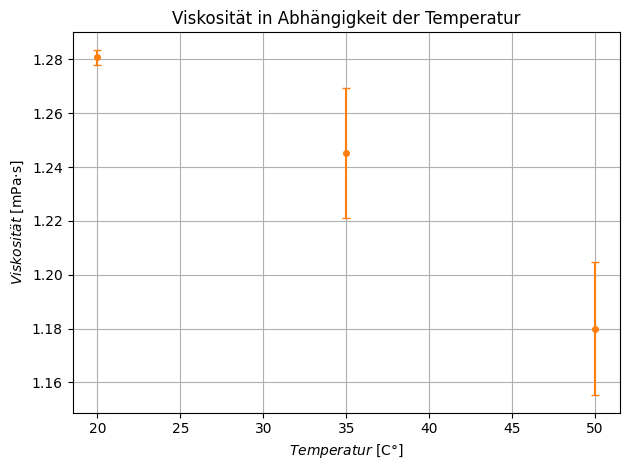

In [17]:


unsicherheit_dichte = 0.001                             #g/cm^3  
dichte_werte = ufloat(0.997, unsicherheit_dichte)       #g/cm^3
dichte = dichte_werte * 1000                            #g/cm^3 --> kg/m^3

unsicherheit_höhe = 0.1             #cm (unsicherheit Lineal?)
h_1 = ufloat(21, unsicherheit_höhe) #cm
h_2 = ufloat(15, unsicherheit_höhe) #cm

h = ((h_1+h_2)/2) /100 #cm #/100 wegen cm-->m

unsicherheit_uhr = 0.2 #s --> 200ms sind menschliche Reaktionszeit
time = unp.uarray([11.8 , 11.7 , 11.6 , 11.7 , 11.7 , 11.8 , 11.6 , 11.8 , 11.6 , 11.7], unsicherheit_uhr) #s

a = 6.1*(10**(-7)) #m/s^2   

visko_raum = a * time * h * dichte *1000 #Pa --> mPa


display(Latex(rf"$$\bar{{\eta}}_{{22}}={mean(visko_raum):.3f}~\mathrm{{mPa}}$$"))

#Temperaturabhängigkeit

#bei ~50 grad
unsicherheit_höhe = 0.1                #cm (unsicherheit Linael?)
h_1_50 = ufloat(21, unsicherheit_höhe) #cm
h_2_50 = ufloat(19, unsicherheit_höhe) #cm

h_50 = ((h_1_50+h_2_50)/2) /100 #cm --> m

unsicherheit_uhr = 0.2 #s
t_50 = ufloat(9.7, unsicherheit_uhr) #s

visko_50 = a * t_50 * h_50 * dichte *1000 #Pa --> mPa

display(Latex(rf"$$\eta_{{50}}={visko_50:.2f}~\mathrm{{mPa}}$$"))


#bei ~35 grad
unsicherheit_höhe = 0.1                #cm (usicherheit Lineal?)
h_1_35 = ufloat(20, unsicherheit_höhe) #cm
h_2_35 = ufloat(19, unsicherheit_höhe) #cm

h_35 = ((h_1_35+h_2_35)/2) / 100 #cm --> m 

unsicherheit_uhr = 0.2 #s
t_35 = ufloat(10.5, unsicherheit_uhr) #s

visko_35 = a * t_35 * h_35 * dichte *1000 #Pa --> mPa

display(Latex(rf"$$\eta_{{35}}={visko_35:.2f}~\mathrm{{mPa}}$$"))

#Graph

T = list([20, 35, 50,]) #temperaturen?
V = unp.nominal_values(list([mean(visko_raum) ,visko_35, visko_50]))        #Die Tatsächlichen Werte
V_std = unp.std_devs(list([mean(visko_raum) ,visko_35, visko_50]))          #Die unsicherheiten der jeweiligen werte (std - standard deviation)

plt.plot(T, V, 'o', markersize=3) #T = x-achse, V = y-achse, 'o' als punkte darstellen (z.b. '-' für liniendarstellung, markersize is punktgröße)
plt.xlabel("$Temperatur $ [C°]")
plt.ylabel(r"$Viskosität $ [mPa$\cdot$s]")
plt.title("Viskosität in Abhängigkeit der Temperatur")
plt.errorbar(T, V, fmt='o',yerr=V_std, capsize=3, markersize=4,label="Messdaten")
#plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


### 1.4 Diskussion

Wie aus den Werten erkennbar wird, sinkt die Viskosität mit zunehmender Temperatur.

## 2. Oberflächenspannung nach der Abreißmethode

Es soll die Oberflächenspannung von destilliertem Wasser mithilfe der Abreißmethode ermittelt werden.

### 2.1 Grundlagen

Moleküle in einer Flüssigkeit halten durch Wechselwirkungen mit den Nachbarmolekülen konstanten Abstand. Die Kräfte die dabei wirken sind sowohl anziehend, als auch abstroßend, je nachdem, welche Kraft von außen auf die Flüsigkeit wirkt. Moleküle, die sich an der Flüssigkeitsoberfläche befinden, haben in diese Richtung keine Nachbarmoleküle. Es wirken daher auch keine Kräfte aus der Frlüssigkeit hinaus. Bewegt sich ein Molekül aus der Flüssigkeit heraus, wird es daher sofort wieder zurück gezogen. Die Energie die pro Fläche aufgewendet werden muss um Moleküle aus der Flüssigkeit zu entfernen wird Oberflächenspannung genannt:

$$\sigma=\frac{\Delta E}{\Delta A}$$

Um die Oberflächenspannung experimentell zu ermitteln, wird die Abreißmethode verwedet. Dabei wird eine Kraft F auf eine Flüssigkeitslamelle angewandt und festgestellt, wann diese reißt. Es gilt dabei:

$\Delta E={F}\cdot{\Delta s}$

Die Änderung der Oberfläche der Lamelle an einem U-förmigen Draht ist gegeben durch:

${\Delta A}=2\cdot b\cdot{\Delta s}$

Fügt man diese Formeln dann zusammen, erhält man als Formel für die Oberflächenspannunng:

\begin{gather}
\sigma = \frac {F}{2 \cdot b}
\end{gather}

In diesem Versuch wird als Lamelle ein Aluminiumring mit Durchmesser D verwendet. Als Näherung wird hier angenommen, dass Innenrdius und Außenradius gleich sind. Wird nun die Oberfläche des Kreises, statt der der U-förmigen Lamelle, in Gl. 1 eingesetzt, bekommt man folgende Formel:

\begin{gather}
\sigma = \frac {F}{2 \cdot \pi \cdot D} 
\tag{2}
\end{gather}

### 2.2 Durchführung und Aufbau

An einem Stativ wird eine Federwaage befestigt und an dieser wiederum der Alumiumring. Nun wird die Federwaage so tariert, dass das Gewicht des Ringes als Nullpunkt angezeigt wird. Auf einer Laborhebebühne wird ein Becherglas mit destilliertem Wasser soweit gehoben, bis es den Ring zur Hälfte bedeckt ist. Nun wird die Hebebühne langsam nach unten gekurbelt, bis die Flüssigkeitslamelle reißt und die Kraft notiert, die die Federwaage unmittelbar vor dem Reißen anzeigt. Diese Messung wird wiederholt um eine Messreihe mit n=10 Messungen anzufertigen. 
Zuletzt wird mittels Gl. 2 die Oberflächenspannung $\sigma$ und ihre Unsicherheit berechnet.

#### Verwendete Geräte und Unsicherheiten

* Federwaage:
* Schublehre:

### 2.3 Daten und Auswertung

In [ ]:
#Abreißmethode / oberflächenspannung von wasser


unsicherheit_kraft = 1      #mN
#Kraft Messungen:
F_werte = unp.uarray([82,81,82,82,81,82,82,80,82,81], unsicherheit_kraft)     #mN
#Mittelwert mit unsicherheit:
F = mean(F_werte)      #mN --> N

#Ring durchmesser
D = ufloat(200, 1) / 1000      #mm --> m

sigma = F/(2*np.pi*D)

display(Latex(rf"$$\bar{{F}}=({F:2f})~\mathrm{{mN}}$$"))
display(Latex(rf"$$\sigma=({sigma:2f})~\mathrm{{\frac{{mN}}{{m}}}}$$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 2.4 Diskussion

Der Literaturwert für die Oberflächenspannung von Wasser bei 20°C liegt bei 72.75 mN/m (https://www.chemie.de/lexikon/Oberfl%C3%A4chenspannung.html#Werte_der_Oberfl.C3.A4chenspannung, 09.10.2025).

